# HDB Dataset no. 3: HDB Car Park Info

## 0. setup

In [1]:
# Packages used
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Numpy Dtypes
# ===========
# https://www.numpy.org/devdocs/user/basics.types.html

#   a) b1, i1, i2, i4, i8, u1, u2, u4, u8, f2, f4, f8, c8, c16, a<n>
#   (representing bytes, ints, unsigned ints, floats, complex and
#    fixed length strings of specified BYTE lengths)

#   b) int8,...,uint8,...,float16, float32, float64, complex64, complex128
#   (this time with BIT sizes)

#c) for strings: str,size # if size !specified, default is 0 len
#   or np.unicode, size


# Functions

In [3]:
def isNumeric(obj):
    try:
        obj + 0 #  chk if object capable of doing math operations, e.g. + 0 
        return True
    except TypeError:
        return False

def getMode(modeDict):
    '''
    Input Parameter:
       modeDict -> a dictionary containing key (categories) and values (frequency count)
       
    Returns:
       . a tuple containing
       ... a list containing >=1 keys (categories)
       ... a var containing a value (the frequency count of the key/s)
       ...... this frequency count is the same for all keys, if > key
       ...... because single or multi-mode, all have the same freq count
       
       Mode -
       . if all numbers have same frequency, there is NO mode
       . if sum(modeDict values) == len(modeDict), there is no mode     
       . there can be more than one mode - i.e. multimode

    '''
    
    lModeK = []
    modeV = 0
    
    if len(modeDict) == 0: print('modeDict must have at least One entry!'); return (lModeK, modeV)    
    
    for k,v in modeDict.items():
        if len(modeDict) > 1:
            if v > modeV:
                # remove existing mode/s
                lModeK.clear()                
                # input the new mode
                lModeK.append(k)
                modeV = v
            elif v == modeV:
                lModeK.append(k)
            # if v < modeV, do nothing, the existing mode/s are still the same
        else:
            lModeK.append(k)
            modeV = v
    
    return (lModeK, modeV)    
    

##  1. Load Dataset
https://docs.scipy.org/doc/numpy/user/basics.rec.html

. genfromtxt() creates a structured/field numpy array

In [4]:
filePath = 'Data\HDB Car Park Info'
fileName = 'hdbCarparkInformation.csv'
filePathName = os.path.join(filePath, fileName) # this should work on both windows and linux

# In order to load properly,
# some data with unnecessary "" were removed, about 114 occurences
# some address had comma inside the cell, e.g. <start>BLK 213-215,218-227 BISHAN STREET 23<end>, have to do manual correction
# chg the comma to /, 87 replacements


# nb: A 'standard' numpy array can only have one dtype, genfromtext actually returns a structured array
# which can hold multiple dtypes
# https://docs.scipy.org/doc/numpy/user/basics.rec.html
npData = np.genfromtxt(filePathName, delimiter=',',skip_header=1,
                       dtype=[('carPark_Num',np.unicode,32),
                              ('address', np.unicode, 128),                           
                              ('coord_X', np.float32),
                              ('coord_Y', np.float32),
                              ('carPark_Type', np.unicode, 32),
                              ('parkingSys_Type', np.unicode, 32),
                              ('parkingTerms_ShortTerm', np.unicode, 32),
                              ('parkingTerms_Free', np.unicode, 32),
                              ('parkingTerms_Night', np.unicode, 32),
                              ('carPark_Decks', np.int16),
                              ('carPark_GantryHeight', np.float32),
                              ('carPark_Basement', np.unicode, 32)],
                       missing_values=['na','-'], filling_values=0, autostrip=True )


In [5]:
# Inspect the loaded file 

print('type(npData) is {}:'.format(type(npData)))
print('npData.shape is {}:'.format(npData.shape))

print('\nPeek at first 5 records to see if anything wrong...')
for i in range(5):
    print(npData[i])

# chk 5 random records
# numpy.random.randint(low, high=None, size=None, dtype='l')
print('\nInspect 5 random records...')
for i in range(5):
    print(npData[np.random.randint(6,len(npData))])
   
print('\nPeek at last 5 records to see if anything wrong...')
for i in range(-5,0): # same as reversed(range(-1,-6,-1))
    print(npData[i])



type(npData) is <class 'numpy.ndarray'>:
npData.shape is (2100,):

Peek at first 5 records to see if anything wrong...
('ACB', 'BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK', 30314.793, 31490.494, 'BASEMENT CAR PARK', 'ELECTRONIC PARKING', 'WHOLE DAY', 'NO', 'YES', 1, 1.8, 'Y')
('ACM', 'BLK 98A ALJUNIED CRESCENT', 33758.414, 33695.52, 'MULTI-STOREY CAR PARK', 'ELECTRONIC PARKING', 'WHOLE DAY', 'SUN & PH FR 7AM-10.30PM', 'YES', 5, 2.1, 'N')
('AH1', 'BLK 101 JALAN DUSUN', 29257.72, 34500.36, 'SURFACE CAR PARK', 'ELECTRONIC PARKING', 'WHOLE DAY', 'SUN & PH FR 7AM-10.30PM', 'YES', 0, 0., 'N')
('AK19', 'BLOCK 253 ANG MO KIO STREET 21', 28185.436, 39012.668, 'SURFACE CAR PARK', 'COUPON PARKING', '7AM-7PM', 'NO', 'NO', 0, 0., 'N')
('AK31', 'BLK 302/348 ANG MO KIO ST 31', 29482.03, 38684.176, 'SURFACE CAR PARK', 'COUPON PARKING', 'NO', 'NO', 'NO', 0, 0., 'N')

Inspect 5 random records...
('BL10', 'BLK 188/191 BOON LAY DRIVE', 14434.581, 36212.21, 'SURFACE CAR PARK', 'ELECTRONIC PARKING', 'WHOLE

## 2. Preprocessing - Clean / Transform

In [6]:
# info:
# ======================
# https://towardsdatascience.com/data-preprocessing-for-non-techies-feature-exploration-and-engineering-f1081438a5de
# https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa
# https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
# https://scikit-learn.org/stable/modules/preprocessing.html
# ======================

# check if there are missing values
for field in npData.dtype.names:
    if str(npData[field][0]).isnumeric():        
        if True in np.isnan(npData[field]):
            print('Column "{}": \tNaN is found!'.format(field))    
        else:
            print('Column "{}": \tNo NaN found'.format(field))    
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html
        # np.isnan returns results in an array. In future, use this to show location of NaN
        # and create a simple tKinter or pyQT utility to interactively 'fix' NaNs or blanks etc
    else:
        blankFound = False
        for idx in range(len(npData[field])):
            if npData[field][idx] == '':
                print('Blank is found')
                blankFound = True
        print('Column "{}": \t\tBlank found == {}'.format(field, blankFound))
            
       



Column "carPark_Num": 		Blank found == False
Column "address": 		Blank found == False
Column "coord_X": 		Blank found == False
Column "coord_Y": 		Blank found == False
Column "carPark_Type": 		Blank found == False
Column "parkingSys_Type": 		Blank found == False
Column "parkingTerms_ShortTerm": 		Blank found == False
Column "parkingTerms_Free": 		Blank found == False
Column "parkingTerms_Night": 		Blank found == False
Column "carPark_Decks": 	No NaN found
Column "carPark_GantryHeight": 		Blank found == False
Column "carPark_Basement": 		Blank found == False


## 3. Exploratory Data Analysis
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

npData ->
dtype=[('quarter',np.unicode,16),('town',np.unicode,16),
                             ('flatType',np.unicode,16),('price',np.float32)], 

In [7]:
print('There are {} rows and {} columns in this dataset'.format(len(npData),len(npData.dtype.names)))

print()

print('The names of the columns are:')
for idx in range(len(npData.dtype.names)):
    print("- {:<10s} {} \tisnumeric: {}".format(npData.dtype.names[idx],type(npData[0][idx]),isNumeric(npData[0][idx])))

print()
    
for idx in range(len(npData.dtype.names)):    
    print('{:<6} unique values in {:<9s} column'.format(len(np.unique(npData[npData.dtype.names[idx]])),npData.dtype.names[idx]))    
    


There are 2100 rows and 12 columns in this dataset

The names of the columns are:
- carPark_Num <class 'numpy.str_'> 	isnumeric: False
- address    <class 'numpy.str_'> 	isnumeric: False
- coord_X    <class 'numpy.float32'> 	isnumeric: True
- coord_Y    <class 'numpy.float32'> 	isnumeric: True
- carPark_Type <class 'numpy.str_'> 	isnumeric: False
- parkingSys_Type <class 'numpy.str_'> 	isnumeric: False
- parkingTerms_ShortTerm <class 'numpy.str_'> 	isnumeric: False
- parkingTerms_Free <class 'numpy.str_'> 	isnumeric: False
- parkingTerms_Night <class 'numpy.str_'> 	isnumeric: False
- carPark_Decks <class 'numpy.int16'> 	isnumeric: True
- carPark_GantryHeight <class 'numpy.float32'> 	isnumeric: True
- carPark_Basement <class 'numpy.str_'> 	isnumeric: False

2100   unique values in carPark_Num column
2094   unique values in address   column
2100   unique values in coord_X   column
2100   unique values in coord_Y   column
7      unique values in carPark_Type column
2      unique values in

In [8]:
print("Inspection of 'unique' values for each field shows that all is in order.")

Inspection of 'unique' values for each field shows that all is in order.


### 3. Visualisation - Pie Chart
In 2018, how many or proportion of HDB carparks in Singapore are Coupon vs Electronic?

In [9]:
NumOfHDBCarParks = len(npData)
print(NumOfHDBCarParks)

2100


Text(-0.9,-1.33,'been converted from Coupon to Electronic.')

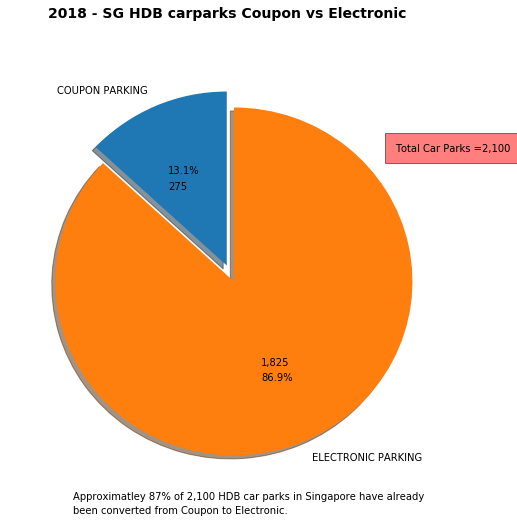

In [10]:
# ****** Data
NumOfHDBCarParks = len(npData)
labels = [item for item in np.unique(npData['parkingSys_Type']) ]
pieData = [ len(npData[npData['parkingSys_Type']== item]) for item in labels]
explode = (0.1, 0) # Explode 2nd

# ****** Plot Customisation
# Slices are ordered, anti-clockwise

fig1, ax1 = plt.subplots()
fig1.set_figheight(8)
fig1.set_figwidth(8)
fig1.suptitle('2018 - SG HDB carparks Coupon vs Electronic', fontsize=14, fontweight='bold')



#ax1.set_title('Coupon vs Electronic')
ax1.pie(pieData, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.text(-0.37,0.53, pieData[0], fontsize=10)
ax1.text(0.15,-0.48, '{:,}'.format(pieData[1]), fontsize=10)
ax1.text(0.9,0.75,'Total Car Parks ={:,}'.format(NumOfHDBCarParks),
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
ax1.text(-0.9,-1.25,'Approximatley 87% of 2,100 HDB car parks in Singapore have already',fontsize=10)
ax1.text(-0.9,-1.33,'been converted from Coupon to Electronic.',fontsize=10)


# Future - querying Data.Gov.SG in real-time
Not part of CA1 submission.
This is a note to myself for future expansion
Q: for real-time is it better to use Javascript/JSON or Python??

In [11]:
# for testing only: accessing data.gov.sg content

import requests

url = 'https://data.gov.sg/api/action/datastore_search?resource_id=139a3035-e624-4f56-b63f-89ae28d4ae4c&limit=5'

mStr = requests.get(url)
#requests.post(url) # unused - for now

print(mStr.content)

b'{"help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search", "success": true, "result": {"resource_id": "139a3035-e624-4f56-b63f-89ae28d4ae4c", "fields": [{"type": "int4", "id": "_id"}, {"type": "text", "id": "car_park_no"}, {"type": "text", "id": "address"}, {"type": "numeric", "id": "x_coord"}, {"type": "numeric", "id": "y_coord"}, {"type": "text", "id": "car_park_type"}, {"type": "text", "id": "type_of_parking_system"}, {"type": "text", "id": "short_term_parking"}, {"type": "text", "id": "free_parking"}, {"type": "text", "id": "night_parking"}, {"type": "numeric", "id": "car_park_decks"}, {"type": "numeric", "id": "gantry_height"}, {"type": "text", "id": "car_park_basement"}], "records": [{"short_term_parking": "WHOLE DAY", "car_park_type": "MULTI-STOREY CAR PARK", "y_coord": "29932.9795", "x_coord": "26179.0760", "free_parking": "SUN & PH FR 7AM-10.30PM", "gantry_height": "2.15", "car_park_basement": "N", "night_parking": "YES", "address": "BLK 70A REDHILL CLOSE",

# Misc Notes

# Sort a specific column in a Numpy Array with other columns keeping the same order with the sorted column

* https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column

z = z[z[:,0].argsort()]    // sort column 0 only, col 1 tags along with changes in col 0

x = z[:,0]

y = z[:,1]
